# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание проекта**

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости, а также определить, какие факторы вляют на ценообразование стоимости квартир.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Цели исследования**

 - Определить рыночную стоимость объектов недвижимости
 - Установить, какие факторы вляют на ценообразование стоимости квартир

**Ход исследования**

Исследование будет состоять из пяти этапов:

1. Открываем файл с данными и изучаем общую информацию
2. Предобработка данных
3. Считаем и добавляем в таблицу новые столбцы
4. Исследовательский анализ 
5. Общий вывод

### Открываем файл с данными и изучаем общую информацию. 

In [1]:
import pandas as pd# Импортируем библиотеку. 

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')# Читаем файл, одновремено разделяем 
# столбцы. 

In [3]:
data.info()# Получаем сводную информацию по датасету.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.head(20)# Вывод на экран 20 строк, для просмотра таблицы.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


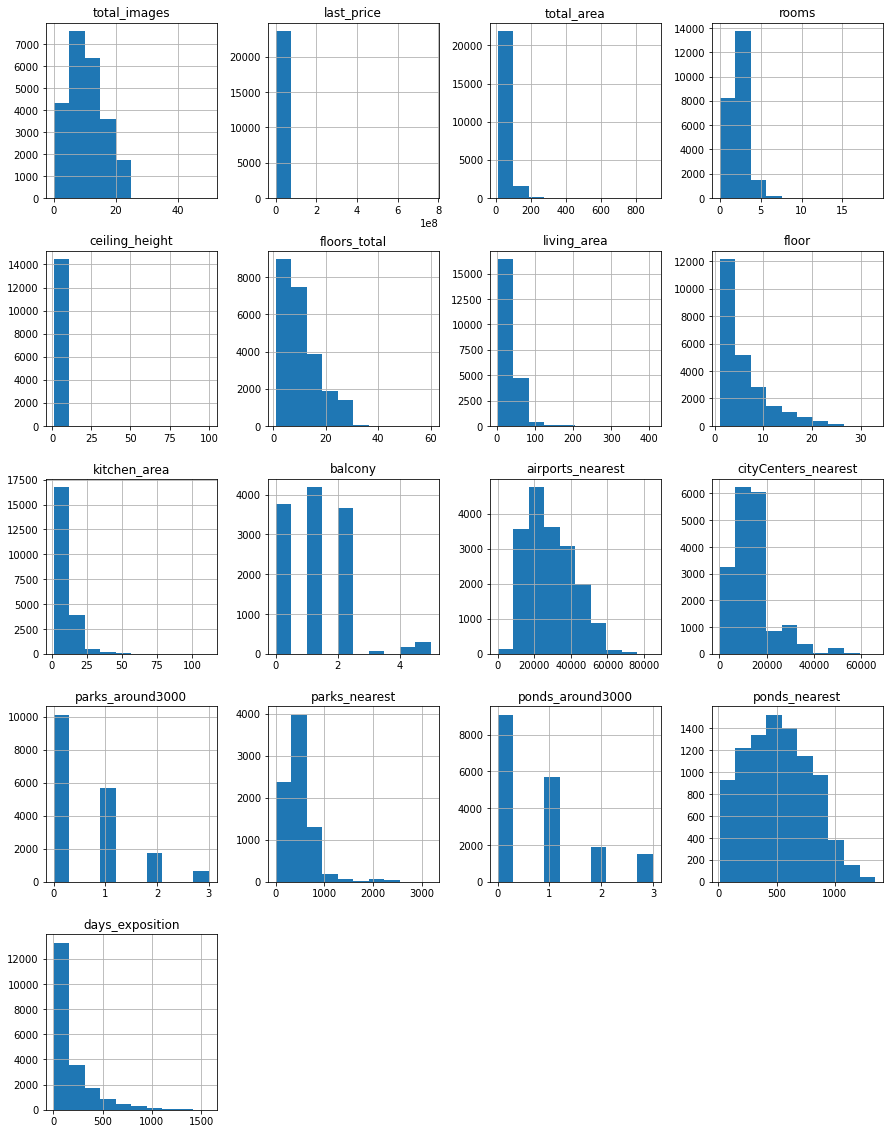

In [5]:
data.hist(figsize=(15, 20));# Вывод гистограмм по каждлму столбцу.

**Вывод**: из выше представленной инфрмации видно следующее, что в датасете в наваниях столбцов, разный регистр; есть пропуски; есть аномальные значения, несоответствие типов данных, нужно поменять формат даты; по гистограммам видно, что присутствуют шумы и выбросы в значениях.  


### Предобработка данных

2.1 Пропущенные значения в столбцах

In [6]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)# Приводим столбец
# к общему стилю. Нижнему регистру.

In [7]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], 
format='%Y-%m-%dT%H:%M:%S')# Переводим формат даты в более удобный. 

In [8]:
data.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN


In [9]:
data.isna().sum()# Выводим количество пропущенных значений для каждого столбца.

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Количество обнаруженных пропусков из 23699:

9195 ceiling_height - практически в трети объявлений пропущена высота потолков, пропуски заполним 
медианным значением.

86 floors_total - данные просто не заполнили из выборки, количество этажей в доме определить невозможно, процент пропусков маленький, оставим как есть.

1903 living_area - заменим пропуски и не логичные значения - медианным значением.

20924 is_apartment - всего аппартаменты - 50, можем предположить что пропуски, это не апартаменты и присвоить False.

2278 kitchen_area - меняем пропуски на медианное з.

11519 balcony - скорее всего там нет балконов, заполняем 0

49 locality_name - Пропусков мало удаляем их.

5542 airports_nearest -  оставляем без изменений. Если далее мешает исследованию, мняем значение.

5519 city_centers_nearest - оставляем без изменений. Если далее мешает исследованию, мняем значение.

5518 parks_around3000 - возможно парков нет в радиусе 3км, заменим на 0.

15620 parks_nearest - возможно рядом парков нет, оставляем без изменений.

5518 ponds_around3000 - значит прудов нет в радиусе 3км, заменим на 0.

14589 ponds_nearest - оставляем без изменений.

3181 days_exposition -  оставляем NaN, может понадобиться для получкения доп. инфрмации.

In [10]:
data['ceiling_height'].describe()# Осмотримся.Оценим данные по столбцу, подумаем, куда двигаться.

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [11]:
data['ceiling_height'].unique()# Посмтрим какие уникальные значения. 

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

<AxesSubplot:ylabel='Frequency'>

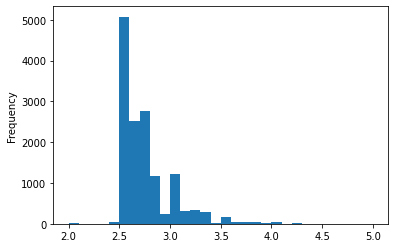

In [12]:
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2,5))
# Создаём график, чтобы был понятен диапазон значений, с которыми работать. 

Ориентируясь на вышеуказанные данные: показатели метода describe(), уникальные значения, и график столбца "ceiling_height", можно привезти значения высоты потолков, которые выбиваваются из логического диапазона от 2.4 м. до 5 м., а так же пропуски к медианному значению. Диапазон высоты 
потолка от 24 м. до 50 м., меняем делением на 10, по причине возможной ошибки записи.

In [13]:
data.loc[(data['ceiling_height'] > 23.9) & (data['ceiling_height'] < 50), 'ceiling_height'] = \
data['ceiling_height'] / 10# Меняем значения в диапазоне 24  м. - 50 м.  

In [14]:
data.loc[(data['ceiling_height'] >= 5) & (data['ceiling_height'] < 23.9), 'ceiling_height'] = \
data['ceiling_height'].median()# Меняем значения в диапазоне 5  м. - 23.9 м.

In [15]:
data.loc[(data['ceiling_height'] > 0.9) & (data['ceiling_height'] < 2.39), 'ceiling_height'] = \
data['ceiling_height'].median()# Меняем значения в диапазоне 0.9  м. - 2.39 м.

In [16]:
data.loc[(data['ceiling_height'] >= 50) & (data['ceiling_height'] <= 100), 'ceiling_height'] = \
data['ceiling_height'].median()# Меняем значения в диапазоне 50  м. - 100 м.

In [17]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
# Меняем пропуски на медианное значение.

In [18]:
data['ceiling_height'].unique()# Проверяем значения высоты потолков. Значения в заданном диапазоне.

array([2.7 , 2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 4.15,
       3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 3.4 , 3.06, 2.72,
       2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 2.87, 2.66, 2.59, 2.45,
       3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62, 3.12, 2.53,
       2.74, 2.96, 2.46, 2.79, 2.95, 4.06, 2.94, 3.82, 3.54, 3.53, 2.83,
       4.7 , 2.4 , 3.38, 3.01, 3.65, 3.9 , 3.18, 3.35, 3.57, 2.48, 2.62,
       2.82, 3.98, 2.63, 3.83, 3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66,
       3.85, 3.86, 4.19, 3.24, 4.8 , 4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07,
       3.37, 3.09, 3.26, 3.34, 2.81, 3.44, 2.97, 3.14, 4.37, 2.68, 3.22,
       3.27, 4.1 , 2.93, 3.46, 3.47, 3.33, 3.63, 3.32, 2.98, 2.86, 3.17,
       4.4 , 3.28, 3.04, 4.45, 3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 4.3 ,
       3.39, 2.69, 3.31, 4.65, 3.56, 3.51, 3.93, 3.42, 2.99, 3.49, 4.14,
       2.91, 3.88, 4.25, 3.29, 3.76, 3.69, 2.89, 3.

In [19]:
data['ceiling_height'].isna().sum()# Проверяем на наличие пропусков. Пропусков нет.

0

In [20]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

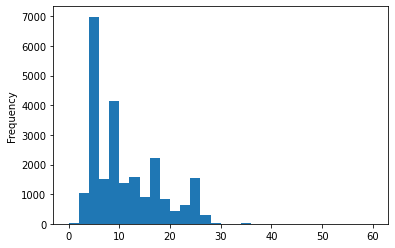

In [21]:
data['floors_total'].sort_values().plot(y = 'floors_total', kind = 'hist', bins = 30, range=(0,60))

In [22]:
data['floors_total'].unique()# Выводим уникальные значения. 

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [23]:
(data['floors_total'].isna().sum() / len(data['floors_total'])).round(4) * 100# Расчёт процента
# пропусков к количеству наблюдений.

0.36

Данные в в столбце "этажность дома", возможно просто не заполнили из выборки, количество этажей 
в доме определить невозможно, процент пропусков маленький, оставим без изменений. Поменяем потом если понадобится. 

In [24]:
data['living_area'].value_counts()# Выводим уникальные значения и их количество.

18.00    882
17.00    675
30.00    598
16.00    486
20.00    481
        ... 
96.40      1
50.26      1
43.81      1
54.43      1
16.74      1
Name: living_area, Length: 1782, dtype: int64

In [25]:
data['living_area'].describe()# Выводим основные показатели.

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

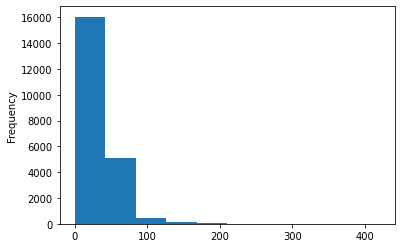

In [26]:
data['living_area'].sort_values().plot(y ='living_area', kind = 'hist', bins = 10, range=(0,420))
# Создаём график, чтобы был понятен диапазон значений, с которыми работать. 

По результатам метода describe(), задаём диапазон метража жилой площади. Минимальные и максимальные
значения не ясны. Сздаём ещё два графика, с минимальными и макимальными значениями жилой площади чтобы более точно рассмотреть диапазон минимальных и максмальных значений, для дальнейшей замены 
значений на медианное.

<AxesSubplot:ylabel='Frequency'>

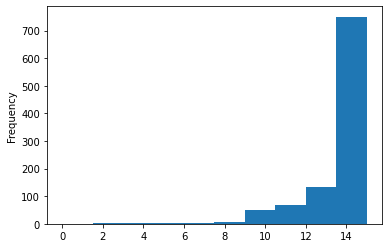

In [27]:
data['living_area'].sort_values().plot(y ='living_area', kind = 'hist', bins = 10, range=(0,15))

При показателе диапазона жилой площади до 15 кв.м, стало ясно, можно считать логически обоснованным минимальную жилую площажь 8 кв.м. Значения до 8 кв.м. заменим медианным значением.

<AxesSubplot:ylabel='Frequency'>

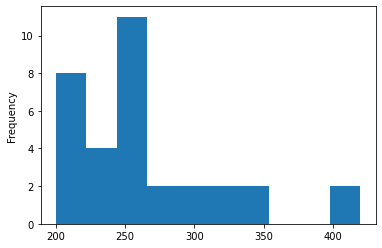

In [28]:
data['living_area'].sort_values().plot(y ='living_area', kind = 'hist', bins = 10, range=(200,420))

Максимальные значения менять не будем. Жилая площадь такого размера может быть в элитной 
недвижимости.

In [29]:
data.loc[(data['living_area'] >= 1) & (data['living_area'] <= 8), 'living_area'] = \
data['living_area'].median()# Меняем значения жилой площади на медианное в диапазоне 1 кв.м - 8 кв.м.

In [30]:
data['living_area'] = data['living_area'].fillna(data['living_area'].median())
# Меняем пропуски на медианное значение.

In [31]:
data['living_area'].isna().sum()# Проверяем на наличие пропусков. Пропусков нет.

0

In [32]:
data.query('living_area > total_area')['living_area'].count()# Проверяем на логическое несоответствие.
# Значения жилой площади которые больше общей площади.

79

In [33]:
data.query('living_area > total_area')['living_area']# Вывод логическое несоответствий.

322      30.0
546      30.0
608      30.0
780      30.0
1053     30.0
         ... 
22356    30.0
22661    30.0
22839    30.0
23500    30.0
23554    30.0
Name: living_area, Length: 79, dtype: float64

In [34]:
data.loc[data['living_area'] > data['total_area'], 'total_area']# Вывод общей площади для замены 
# несоответствий. Для визуализации.

322      25.0
546      25.0
608      25.0
780      26.1
1053     29.0
         ... 
22356    17.2
22661    24.0
22839    27.0
23500    29.0
23554    26.0
Name: total_area, Length: 79, dtype: float64

In [35]:
data.loc[data['living_area'] > data['total_area'], 'living_area'] = data.loc[data['living_area'] > \
data['total_area'], 'total_area']# Заменяем значение жилой площади, которая больше общей площади, 
# на значение общей площади. Несответствий немного - погрешность будет несущественна.

In [36]:
data.query('living_area > total_area')['living_area'].count()# Проверяем на логическое несоответствие.

0

In [37]:
data['is_apartment'].describe()# Выводим сводную информацию по столбцу апартаменты.

count      2775
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object

In [38]:
data['is_apartment'].unique()# Выводим уникальные значения по столбцу.

array([nan, False, True], dtype=object)

In [39]:
data['is_apartment'].value_counts()# Выводим количество уникальных значений по столбцу.

False    2725
True       50
Name: is_apartment, dtype: int64

In [40]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)# Выясняем количество знчений в  
# аппартаментах. Всего аппартаменты - 50. Заменяем пропущенные значения на "нет".

In [41]:
data['is_apartment'].isna().sum()# Проверяем на наличие пропусков. Пропусков нет.

0

In [42]:
data['is_apartment'].value_counts()# Проверяем на наличие пропусков по количеству.

False    23649
True        50
Name: is_apartment, dtype: int64

In [43]:
data['kitchen_area'].describe()# Выводим сводную информацию по столбцу площадь кухни.

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [44]:
data['kitchen_area'].unique()# Выводим количество уникальных значений по столбцу.

array([ 25.  ,  11.  ,   8.3 ,    nan,  41.  ,   9.1 ,  14.4 ,  18.9 ,
         8.81,   6.5 ,   8.5 ,   6.  ,   9.  ,   5.2 ,   8.  ,   7.6 ,
         5.6 ,  12.  ,   5.7 ,   6.1 ,  19.6 ,  15.  ,   7.  ,   9.2 ,
        11.7 ,  13.4 ,  17.  ,   6.3 ,  11.6 ,   8.8 ,  10.  ,  17.6 ,
         7.5 ,   9.5 ,  50.  ,  15.5 ,  10.7 ,  11.1 ,  20.  ,  11.9 ,
        16.  ,   5.3 ,  11.5 ,   7.2 ,   6.2 ,  10.4 ,   7.1 ,   4.9 ,
         7.3 ,  11.95,  10.2 ,   6.4 ,   5.5 ,  13.  ,   8.4 ,  23.6 ,
        10.8 ,  18.3 ,   5.  ,   8.2 ,  24.  ,  23.8 ,   6.6 ,  26.85,
        15.4 ,   7.8 ,  33.8 ,   5.4 ,  12.72,  12.2 ,  19.  ,  12.4 ,
         7.9 ,  10.3 ,   9.8 ,  17.5 ,  14.7 ,  20.91,  21.3 ,  10.6 ,
        10.9 ,   9.7 ,   7.7 ,  12.5 ,  11.4 ,   8.6 ,  11.24,  14.1 ,
        15.7 ,  13.29,  14.  ,  12.9 ,  12.7 ,  16.5 ,   9.36,  21.5 ,
        35.  ,  10.5 ,   8.7 ,  19.3 ,  21.4 ,  40.  ,  49.2 ,  11.52,
         8.9 ,   9.6 ,  30.  ,  14.2 ,   8.1 ,  10.44,   4.5 ,  16.3 ,
      

<AxesSubplot:ylabel='Frequency'>

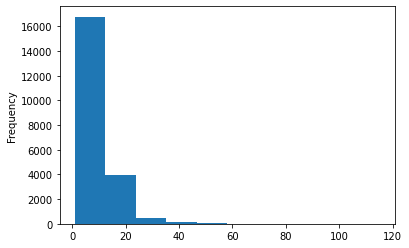

In [45]:
data['kitchen_area'].sort_values().plot(y ='kitchen_area', kind = 'hist', bins = 10, range=(1,115))

Всего строк значений площади кухни 21421, из них 2278 пропуски, уникальных значений 971, минимальное
значение площади кухни 1.3, менять такие значения не будем, потому что бывают квартиры очень маленькой общей площади, а такое значение нас устраивает для дальнейших вычислений. Максимальные
значния площади кухни то же оставим, так как вероятность существования объектов элитной недвижимости
с большими кухнями высока. Заменим только пропуски, рассчитаем среднее для квартир отношение кухонной площади к общей площади и в этом соотношении заменим неверные значения.

In [46]:
data['kitchen_area'].fillna((data['kitchen_area'].mean() / data['total_area'].mean()) * \
data['total_area'], inplace=True)#  рассчитаем среднее для квартир отношение кухонной площади 
# к общей площади и в этом соотношении заменим пропуски.

In [47]:
data['kitchen_area'].isna().sum()# Проверяем на наличие пропусков. Пропусков нет.

0

In [48]:
data['balcony'] = data['balcony'].fillna(0)# Скорее нет балконов, заполняем 0.

In [49]:
data['balcony'].isna().sum()# Проверяем на наличие пропусков. Пропусков нет.

0

Причина пропусков - возможно, незаполнение поля клиентом ввиду отсутствия балкона. Заменим на 0.

In [50]:
data['locality_name'].describe()

count               23650
unique                364
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object

In [51]:
data.dropna(subset=['locality_name'], inplace=True)

В столбце "название населённого пункта" 49 пропусков, возможно просто не заполнили из выборки, значения категориальные, восстановить не получится, удаляем их.

In [52]:
data['airports_nearest'].describe() 

count    18116.000000
mean     28803.225878
std      12637.314144
min          0.000000
25%      18575.750000
50%      26756.500000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:ylabel='Frequency'>

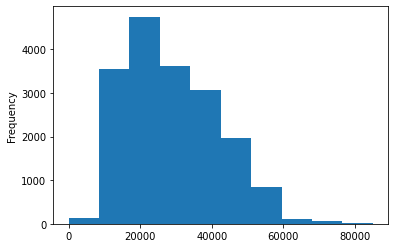

In [53]:
data['airports_nearest'].sort_values().plot(y ='airports_nearest', kind = 'hist', bins = 10, 
range=(0,85000))

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

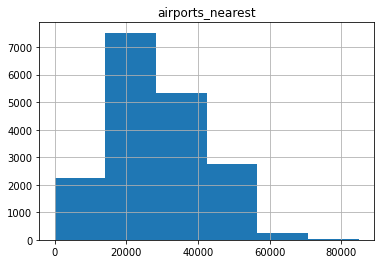

In [54]:
data.hist('airports_nearest', bins=6)# Просто для сравнения. Верхняя более точная.

Пропусков 5542. Пропуски оставляем без изменения. Замена на 0 будет некоректной, так же как и замена на среднее или медианное значение. Можно расчитать по адресу в объявлении, по геолокации. Но пропусков много. Можно применить к одному или нескольким объектам. 
Если пропуски будут мешать исследованию в дальнейшем, заменим их.

In [55]:
data['city_centers_nearest'].describe()

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<AxesSubplot:ylabel='Frequency'>

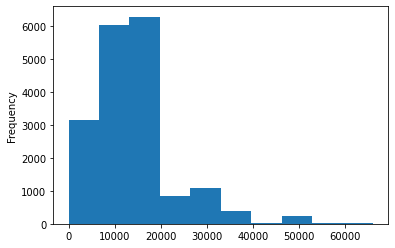

In [56]:
data['city_centers_nearest'].sort_values().plot(y ='city_centers_nearest', kind = 'hist', bins = 10, 
range=(0,66000))

Пропусков 5542. Пропуски оставляем без изменения. Замена на 0 будет некоректной, так же как и замена на среднее или медианное значение. Можно расчитать по адресу в объявлении, по геолокации. Но пропусков много. Можно применить к одному или нескольким объектам. Если пропуски будут мешать исследованию в дальнейшем, заменим их.

In [57]:
data['parks_around3000'].describe()

count    18140.000000
mean         0.611577
std          0.802003
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

<AxesSubplot:ylabel='Frequency'>

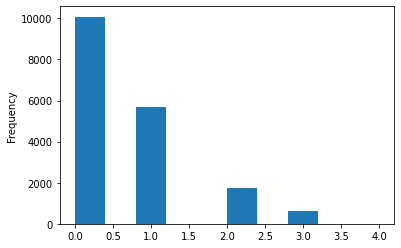

In [58]:
data['parks_around3000'].sort_values().plot(y = 'parks_around3000' , kind = 'hist', bins = 10, 
range=(0,4))

In [59]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

Пропусков 5518. Пропуски заменим на 0. Причина пропусков - возможно, 
незаполнение поля клиентом ввиду отсутствия парков рядом с объектом недвижимости 

In [60]:
data['parks_nearest'].describe()

count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:ylabel='Frequency'>

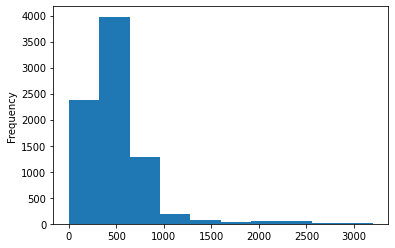

In [61]:
data['parks_nearest'].sort_values().plot(y ='parks_nearest', kind = 'hist', bins = 10, 
range=(0,3200))

Пропусков 15620. Pасстояние до ближайшего парка (м). Пропуски оставляем без изменения.Пропуски сами по себе могут быть полезными и нести информацию. Если пропуски будут мешать исследованию в дальнейшем, заменим их.
Причина пропусков - возможно, незаполнение поля клиентом ввиду отсутствия парков рядом с объектом недвижимости.

In [62]:
data['ponds_around3000'].describe() 

count    18140.000000
mean         0.769680
std          0.937948
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

<AxesSubplot:ylabel='Frequency'>

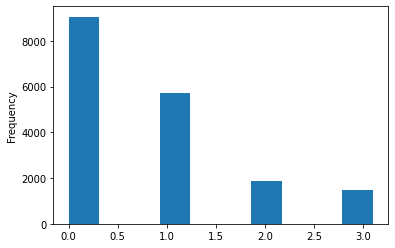

In [63]:
data['ponds_around3000'].sort_values().plot(y = 'ponds_around3000', kind = 'hist', bins = 10, 
range=(0,3.1))

In [64]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Пропусков 5518. Число водоёмов в радиусе 3 км. Количество пропусков 'ponds_around3000', совпадает с 
кличеством пропусков 'parks_around3000'. Если значение ноль - водоёмов нет. Пропуски заменим на 0. Причина пропусков - возможно, незаполнение поля клиентом ввиду отсутствия парков рядом с объектом недвижимости

In [65]:
data['ponds_nearest'].describe()

count    9085.000000
mean      518.059879
std       277.841733
min        13.000000
25%       293.000000
50%       502.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

<AxesSubplot:ylabel='Frequency'>

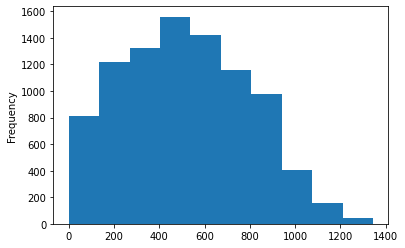

In [66]:
data['ponds_nearest'].sort_values().plot(y = 'ponds_nearest', kind = 'hist', bins = 10, 
range=(0,1344))

Пропусков 14589. Pасстояние до ближайшего водоёма (м). Пропуски оставляем без изменения.
Менять на 0 некоректно, сильно повлияет на показатели при расчётах, Пропуски сами по себе могут 
быть полезными и нести информацию. Если пропуски будут мешать 
исследованию в дальнейшем, заменим их. Причина пропусков - возможно, незаполнение поля 
клиентом ввиду отсутствия водоёмов рядом с объектом недвижимости.

In [67]:
 data['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [68]:
data['days_exposition'].unique()

array([  nan,   81.,  558., ..., 1360., 1007.,  971.])

In [69]:
data['days_exposition'] = round(data['days_exposition'])# Округляем не целые числа до целых.
# В этом столбце они не нужны.

In [70]:
data['days_exposition'].unique()

array([  nan,   81.,  558., ..., 1360., 1007.,  971.])

<AxesSubplot:ylabel='Frequency'>

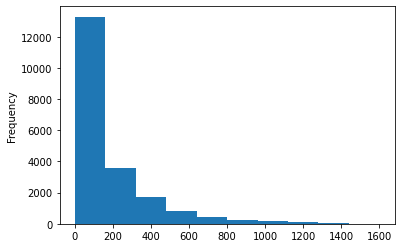

In [71]:
data['days_exposition'].sort_values().plot(y = 'days_exposition', kind = 'hist', bins = 10, 
range=(0,1600))

3181 days_exposition — сколько дней было размещено объявление (от публикации до снятия). Оставляем NaN.Возможно оставить NaN, как несущие дополнительную информацию. Возможно не коректная дата публикации. Проанализировать даты публикации с NaN в столбце  days_exposition. Менять на 0 или среднее некоректно.

In [72]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

**Вывод по пропущенным значениям в столбцах**  

Столбцов с пропущнными значениями 14 из 22-х столбцов.
Причины, которые могли привести к пропускам в данных:
- Клиент не указал значение в ячейке.
- Ошибка в записи.
- Ощибки при выгрузке файла. 
- Смена формата файла.

Замена на 0 в некоторых стобцах будет некоректной, так же как и замена на среднее или медианное значение. Пропуски сами по себе могут быть полезными и нести информацию

2.2 Типы данных

In [73]:
data.info()# Выводим типы данных по каждому столбцу.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

In [74]:
data.sum()# Смотрим как считает.

total_images                                                       233244
last_price                                                 154697651136.0
total_area                                                     1426782.49
rooms                                                               48958
ceiling_height                                                   63766.56
floors_total                                                     251577.0
living_area                                                 806071.151512
floor                                                              139376
is_apartment                                                           50
studio                                                                149
open_plan                                                              67
kitchen_area                                                248392.943059
balcony                                                           13994.0
locality_name           Санкт-Петербур

Ниже представлены столбцы в которых будем менять типы данных, а в каких нет. 

 - total_images  -             int64 не меняем 
 - last_price  -               float64 меняем на int64
 - total_area  -               float64 не меняем, сотые и десятые нужны в площади
 - first_day_exposition -      поправили дату ранее на более удобную, тип встал автоматически
 - rooms -                     int64 не меняем
 - ceiling_height -            float64 не меняем, сотые и десятые нужны в площади
 - floors_total -              float64 меняем на int64, целые числа
 - living_area -               float64 не меняем
 - floor -                     int64 не меняем
 - is_apartment -              bool не меняем, два значения
 - studio -                    bool не меняем, два значения
 - open_plan -                 bool не меняем
 - kitchen_area -              float64 не меняем
 - balcony -                   float64 меняем на int64, целые числа
 - locality_name -             object меняем на string , строки
 - airports_nearest -          float64 меняем на int64, целые числа
 - city_centers_nearest -      float64 меняем на int64, целые числа
 - parks_around3000 -          float64 меняем на int64, целые числа
 - parks_nearest -             float64 меняем на int64, целые числа
 - ponds_around3000 -          float64 меняем на int64, целые числа
 - ponds_nearest -             float64 меняем на int64, целые числа
 - days_exposition -           float64 меняем на int64, целые числа

In [75]:
data = data.convert_dtypes()

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  Int64         
 1   last_price            23650 non-null  Int64         
 2   total_area            23650 non-null  Float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  Int64         
 5   ceiling_height        23650 non-null  Float64       
 6   floors_total          23565 non-null  Int64         
 7   living_area           23650 non-null  Float64       
 8   floor                 23650 non-null  Int64         
 9   is_apartment          23650 non-null  boolean       
 10  studio                23650 non-null  boolean       
 11  open_plan             23650 non-null  boolean       
 12  kitchen_area          23650 non-null  Float64       
 13  balcony         

Вывод: ранее были исправлены  выбивающиеся значения в столбцах "высота потолков" и  округлены до целых, значения в столбце "дата публикации", поменян формат даты. В результате применения метода 
автоматической установки типа данных,правильный тип данных в столбцах датафрейма установился в соответствии с значениям.

2.3 Уникальные значения

In [77]:
len(data['locality_name'].unique())# Выводим количество неявных дубликатов.

364

In [78]:
data['locality_name'] = data['locality_name'].str.lower()# Приводим все названия в столбце к нижнему
# регистру.

In [79]:
data['locality_name'].unique().sum()# Выводим уникальные названия и осматриваем на наличие дубликатов.

'санкт-петербургпосёлок шушарыгородской посёлок янино-1посёлок парголовопосёлок муриноломоносовсертоловопетергофпушкиндеревня кудровокоммунарколпинопоселок городского типа красный боргатчинапоселок муринодеревня фёдоровскоевыборгкронштадткировскдеревня новое девяткинопосёлок металлостройпосёлок городского типа лебяжьепосёлок городского типа сиверскийпоселок молодцовопоселок городского типа кузьмоловскийсадовое товарищество новая ропшапавловскдеревня пикколововсеволожскволховкингисеппприозерсксестрорецкдеревня куттузипосёлок аннинопоселок городского типа ефимовскийпосёлок плодовоедеревня заклиньепоселок торковичипоселок первомайскоекрасное селопосёлок понтонныйсясьстройдеревня стараядеревня лесколовопосёлок новый светсланцысело путиловоивангородмуриношлиссельбургникольскоезеленогорсксосновый борпоселок новый светдеревня оржицыдеревня кальтинокудровопоселок романовкапосёлок бугрыпоселок бугрыпоселок городского типа рощинокиришилугаволосовоотрадноесело павловопоселок оредежсело копорьепос

In [80]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')# Заменяем в названиях "ё" на "е".

In [81]:
len(data['locality_name'].unique())# 34 дубликата устранены, в связи замены "ё" на "е".

330

In [82]:
def locality_type(name):
    if pd.isna(name):
        return 'unknown'
    if 'санк' in name:
        return 'город'
    if 'городск' in name:
        return 'ПГТ'
    if any(x in name for x in ['железн','посел', 'стан' 'коттедж', 'котедж']):
        return 'поселок'
    if any(x in name for x in ['садов', 'неком', 'товар']):
        return 'товарищество'
    if 'еревн' in name:
        return 'деревня'
    if 'сел' in name:
        return 'село'
    
    else:
        return 'unknown'
 # Функция для группирования ошибочных и повторяющихся типов названий.

In [83]:
data.insert(loc=15, column='locality_type', value=data['locality_name'].apply(locality_type))
# Создаем на основе столбца с наименованиями, столбец с типами населенных пунктов. 

In [84]:
def cleaning_name_type(column):
    clean_names_column = column.str.replace("|".join(['поселок', 'городского типа', 'городской',  
'деревня', 'коттеджный','село','посёлок', 'при железнодорожной станции',
'садоводческое некоммерческое товарищество', 'садовое товарищество', 'станции', 'городск', 
'еревня', 'садовое ищество', 'железн','посел', 
'стан' 'коттедж', 'котедж', 'город','село']), "", regex=True).str.strip()
    return clean_names_column
# Функция для удаления типов наименований.

In [85]:
data.insert(loc=15, column='locality_clean_name', value=cleaning_name_type(data['locality_name']))
# Создаем на основе столбца с наименованиями, столбец с наименованиями, без типа населенных пунктов.

In [86]:
len(data['locality_name'].unique())# Проверяем на количество дубликатов.

330

In [87]:
len(data['locality_clean_name'].unique())# Проверяем на количество дубликатов.

305

In [88]:
data.head()# Смотрим, что получилось.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,locality_clean_name,locality_type,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,санкт-петербург,санкт-петербург,город,18863,16028,1,482,2,755,<NA>
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,поселок шушары,шушары,поселок,12817,18603,0,<NA>,0,<NA>,81
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,санкт-петербург,санкт-петербург,город,21741,13933,1,90,2,574,558
3,0,64900000,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,санкт-петербург,санкт-петербург,город,28098,6800,2,84,3,234,424
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,санкт-петербург,санкт-петербург,город,31856,8098,2,112,1,48,121


Вывод: В столбце 'locality_name' выявлены строки, в которых не был указан населенный пункт (удалены
ранее), а также неявные дубликаты: в наименованиях населенных пунктов использовался разный стиль написания, что затруднило бы дальнейший анализ данных. Для удобства восприятия сзданы два новые два столбца, 
'locality_type' - отдельный столбец для очищенных и сгруппированных типов населённых пунктов, и
'locality_clean_name' -  с наименованиями, без типа населенных пунктов.
   Причина пропусков и различного стиля написания населенных пунктов - либо в разных источниках данных, либо субъективный человеческий фактор при заполнении таблицы. Количество уникальных значений составило 305. Оставлен для наглядности.

2.4 Редкие и выбивающиеся значения

Редкие и выбивающиеся значения в столбце 'ceiling_height' устранены ранее.

Редкие и выбивающиеся значения в столбце 'living_area' устранены ранее.

In [89]:
data['kitchen_area'].value_counts(dropna=False)# Перепроверил количство NaN, заодно посмотрел 
# выбивающиеся значения, они есть. До этого пробовал округлиться - не вышло. По info и dtype
# было float64.

6.0                   1298
10.0                  1259
8.0                   1108
9.0                   1100
7.0                   1062
                      ... 
8.96746024337756         1
32.55                    1
3.818176431750602        1
17.864862203603735       1
NaN                      0
Name: kitchen_area, Length: 1688, dtype: Int64

In [90]:
data['kitchen_area'] = data['kitchen_area'].astype(float)# Принудительно восстанавливаем тип данных.

In [91]:
round(data['kitchen_area'], 2)# Округляем столбец до сотых. В площяди недвижимости сотые учавствуют.

0        25.00
1        11.00
2         8.30
3        27.85
4        41.00
         ...  
23694    13.83
23695     8.50
23696     9.93
23697    23.30
23698     9.00
Name: kitchen_area, Length: 23650, dtype: float64

<AxesSubplot:>

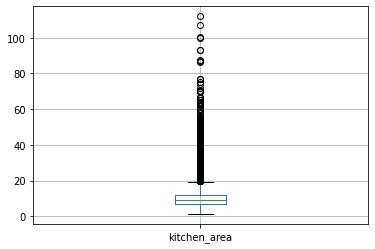

In [92]:
data.boxplot(column=['kitchen_area'])

Минимальное значение площади кухни 1.3, менять такие значения не будем, потому что бывают квартиры очень маленькой общей площади, а такое значение нас устраивает для дальнейших вычислений. Максимальные значния площади кухни то же оставим, так как вероятность существования объектов элитной недвижимости с большими кухнями высока.

In [93]:
data['rooms'].describe()# Выводим показатели.

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [94]:
data['rooms'].value_counts(dropna=False)# По данным количества комнот у меня вопросов нет.
# Квартир с большим количеством комнат немного, в реальности может иметь место.

1      8036
2      7924
3      5797
4      1175
5       326
0       197
6       105
7        59
8        12
9         8
10        3
11        2
14        2
19        1
16        1
12        1
15        1
NaN       0
Name: rooms, dtype: Int64

<AxesSubplot:ylabel='Frequency'>

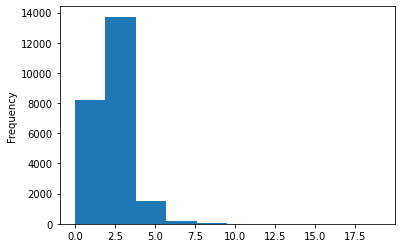

In [95]:
data['rooms'].sort_values().plot(y = 'rooms', kind = 'hist', bins = 10, 
range=(0,19))

На графике видно, что значений более 9 - нет. Все значения более 9 отбрасываем.

In [96]:
data.query('rooms == 0 and is_apartment')['rooms'].count()# Квартиры без комнат и апартаменты.

0

In [97]:
data.query('rooms == 0 and ~open_plan and ~studio')['rooms'].count()# Квартиры 
# без комнат не апартаменты и не свободная планировка

0

In [98]:
data.query('rooms == 0')['rooms'].count()# Квартиры без комнат.

197

In [99]:
data.query('rooms == 0 and open_plan')['rooms'].count()# Квартиры без комнат и свободная планировка.

59

In [100]:
data.query('rooms == 0 and studio')['rooms'].count()# Квартиры без комнат и студии.

138

In [101]:
data.query('studio == True')['rooms'] .value_counts()# Проверил количество значений.

0    138
1     11
Name: rooms, dtype: Int64

In [102]:
data.loc[(data['rooms'] == 1) & (data['studio']==True),'rooms'] = 0# Присваиваем значение '0' 
# в ячейках со значением '1'.

In [103]:
data.query('rooms == 1 and studio')['rooms'].count()# Проверил количество значений после изменения.

0

In [104]:
data = data[data.rooms <= 9]# Значения больше 9. отбрасываем.

In [105]:
data['airports_nearest'].describe()# Основные показатели.

count    18105.000000
mean     28806.155869
std      12639.588433
min          0.000000
25%      18574.000000
50%      26758.000000
75%      37310.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:>

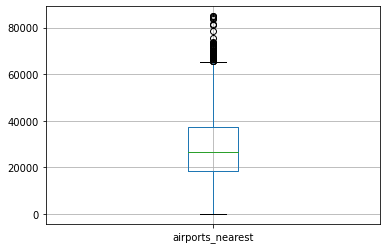

In [106]:
data.boxplot(column=['airports_nearest'])# Выбивающиеся значения расположены более 60000 м и их
# немного, ничего менять не будем и их можно считать реальными.

<AxesSubplot:ylabel='Frequency'>

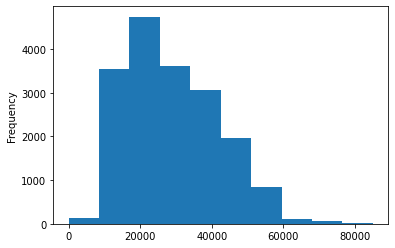

In [107]:
data['airports_nearest'].sort_values().plot(y ='airports_nearest', kind = 'hist', bins = 10, 
range=(0,85000))

In [108]:
data.query('airports_nearest < 200')['airports_nearest']# Срез значений растояния менее 200 метров до 
# аэропорта. 200 метров - возможное минимальное расстояние жилой застройки от аэропорта.

21085    0
Name: airports_nearest, dtype: Int64

In [109]:
data.loc[data['airports_nearest'] < 200]#  Одно нулевое значение, на коректность не влияет. 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,locality_clean_name,locality_type,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000,34.7,2018-09-23,1,2.7,9,19.8,3,False,...,санкт-петербург,санкт-петербург,город,0,22801,0,<NA>,0,<NA>,60


Пропруски были описаны ранее. Оставлены. Можно предположить, что пользователь затруднился указать 
растояние, возможно квартира находится далеко. Я посчитал, что заполнять медианное или среднее
некоректно.

In [110]:
data['total_area'].describe()

count    23639.000000
mean        60.192182
std         34.824049
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        631.200000
Name: total_area, dtype: float64

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

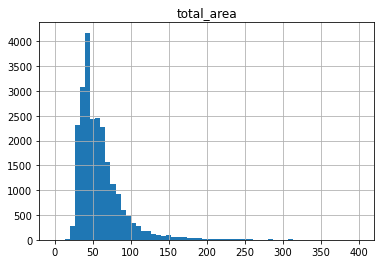

In [111]:
data.hist('total_area', bins=60, range=(0,400))

In [112]:
data = data[data.total_area <= 250]# Удаляем строки со значением общей площади более 250.

Вывод: минимальная площадь общяя площадь картиры 12 кв.м. аномалией назвать не можем. Квартиры  со
значением общей площади более 250 кв.м. удаляем, на графике их не видно, являются аномальными значениями. Выбивающиеся значения
исправлены.

In [113]:
data['studio'].describe()

count     23534
unique        2
top       False
freq      23385
Name: studio, dtype: object

In [114]:
data['studio'].value_counts(dropna=False)# Всё хорошо данные сходятся с 'rooms'.

False    23385
True       149
NaN          0
Name: studio, dtype: Int64

Аномалий нет, значения исправлены ранее.

In [115]:
data['parks_around3000'].describe()

count    23534.000000
mean         0.465624
std          0.744552
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

In [116]:
data['parks_around3000'].unique()

<IntegerArray>
[1, 0, 2, 3]
Length: 4, dtype: Int64

'parks_around3000' - Всё нормальнло, аномалий и выбивающихся значений нет.

In [117]:
data['ponds_around3000'].describe()

count    23534.000000
mean         0.586853
std          0.880869
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

In [118]:
data['ponds_around3000'].unique()

<IntegerArray>
[2, 0, 3, 1]
Length: 4, dtype: Int64

'ponds_around3000' -  Всё нормальнло, аномалий и выбивающихся значений нет.

In [119]:
data['days_exposition'].describe()

count    20378.000000
mean       180.192953
std        219.125380
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медианное время продажи - 95 дней. Среднее время продажи - 181 день.
В основном квартиры продаются за срок в 100 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев.
Быстрой продажей можно назвать срок в 45 дней и меньше. Долгой продажей - 230 дней (7,5 месяцев) и дольше.
Объявления с большим сроком продажи скорее всего забыли снять с публикации.

In [120]:
data['days_exposition'].unique()

<IntegerArray>
[<NA>,   81,  558,  424,  121,   55,  155,  189,  289,  137,
 ...
 1032,  993, 1201, 1130, 1052, 1187, 1200, 1360, 1007,  971]
Length: 1139, dtype: Int64

Аномалий нет. Значения будем считать коректными.

In [121]:
data['last_price'] = data['last_price'].astype(int)# Поменял тип данных. Не работало.

In [122]:
round(data['last_price'].describe())# Посмотрел общие показатели.

count        23534.0
mean       6189016.0
std        7056623.0
min          12190.0
25%        3400000.0
50%        4600000.0
75%        6700000.0
max      330000000.0
Name: last_price, dtype: float64

In [123]:
round(data['last_price'] / 1000000).describe()# Посмотрел как выглядят показатели разделённые на млн.

count    23534.000000
mean         6.188876
std          7.062756
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max        330.000000
Name: last_price, dtype: float64

<AxesSubplot:>

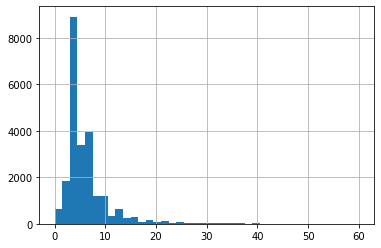

In [124]:
round(data['last_price'] / 1000000).hist(bins=40, range=(0,60))# Гистограмма с значениями 
# разделёнными на млн. для удобства восприятия, на которой видно выбивающиеся значения. 

In [125]:
data = data[data.last_price <= 40000000]# Значения больше 40 млн. отбрасываем.

In [126]:
round(data['last_price'] / 1000000).describe()

count    23416.000000
mean         5.862017
std          4.502094
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         40.000000
Name: last_price, dtype: float64

Вывод по разделу: были обнаружены аномальные значения. Например такие как большая, общяя площадь квартиры, количество комнат более 9, стоимость квартир более 40 млн. Аноиальные и выбивающиеся значения исправлены и отброшены.

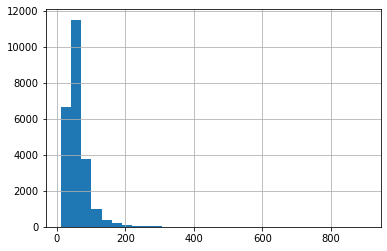

In [127]:
#код ревьюера
data2 = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
(data2['total_area']).hist(bins=30);

### Считаем и добавляем в таблицу новые столбцы

In [128]:
data['price_sq_m'] = data['last_price'] / data['total_area']# добавляем столбец 
# price_sq_meter с расчетом 1 кв м

In [129]:
data['price_sq_m'] = data['price_sq_m'].astype(float)# Не округлялся из за типа данных.

In [130]:
data['price_sq_m'] = data['price_sq_m'].round()# Округление до целых.

In [131]:
data['day_pub_week'] = data['first_day_exposition'].dt.dayofweek
# Добавляем столбец день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [132]:
data['month_pub'] = data['first_day_exposition'].dt.month# Добавляем столбец месяц публикации 
# объявления. 

In [133]:
data['year_pub'] = data['first_day_exposition'].dt.year# Добавляем столбец год публикации 
# объявления.  

In [134]:
def floor_cat(row):# функция, определяющая категорию этажа.
    try: 
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
             return 'последний'
        else:
            return 'другой'
    except:
        pass

In [135]:
data['floor_gr'] = data.apply(floor_cat, axis=1)# Добавляем столбец тип 
# этажа квартиры (значения — «первый», «последний», «другой»)

In [136]:
data['city_centers_nearest'] = data['city_centers_nearest'].astype(float)# Принудительное переведение
# в формат float, по причине не желания округления.

In [137]:
data['city_centr_nrst_km'] = round(data['city_centers_nearest'] / 1000)# Округление с добавлением
# нового столбца.

### Исследовательский анализ данных

4.1 Гистограммы для параметров.

<AxesSubplot:>

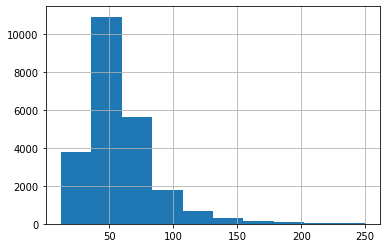

In [138]:
data['total_area'].hist()

<AxesSubplot:>

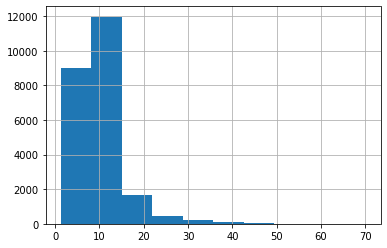

In [139]:
data['kitchen_area'].hist()

<AxesSubplot:>

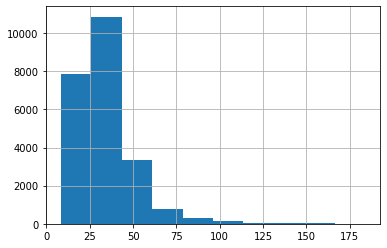

In [140]:
data['living_area'].hist()

<AxesSubplot:>

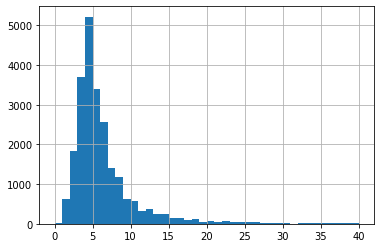

In [141]:
round(data['last_price'] / 1000000).hist(bins=40, range=(0,40))# Значения столбца разделены на млн.

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

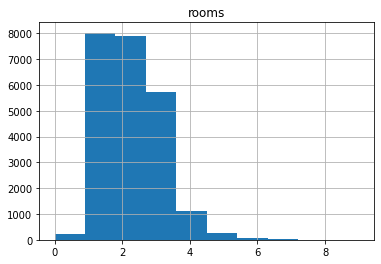

In [142]:
data.hist('rooms', bins=10)

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

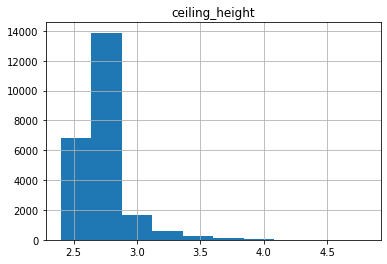

In [143]:
data.hist('ceiling_height', bins=10)

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

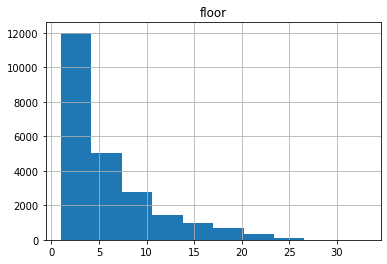

In [144]:
data.hist('floor', bins=10)

<AxesSubplot:>

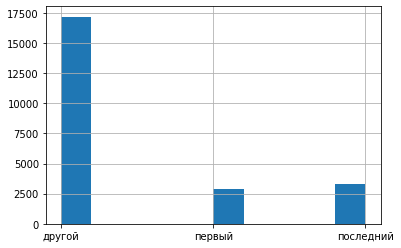

In [145]:
data['floor_gr'].hist()

<AxesSubplot:>

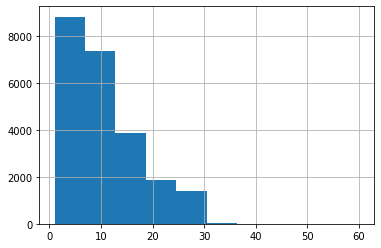

In [146]:
data['floors_total'].hist()

<AxesSubplot:>

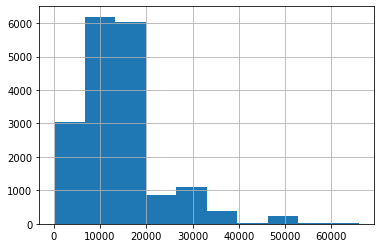

In [147]:
data['city_centers_nearest'].hist()

<AxesSubplot:>

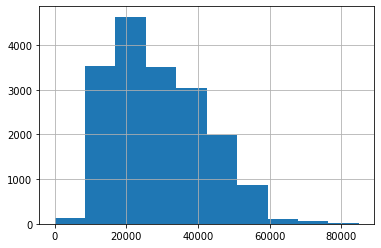

In [148]:
data['airports_nearest'].hist()

<AxesSubplot:>

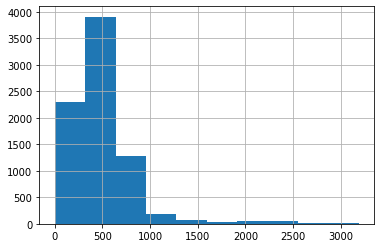

In [149]:
data['parks_nearest'].hist()

<AxesSubplot:>

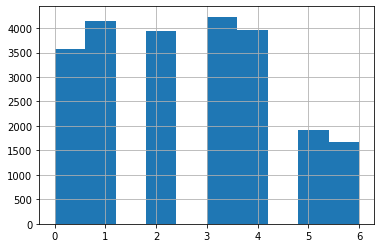

In [150]:
data['day_pub_week'].hist()

<AxesSubplot:>

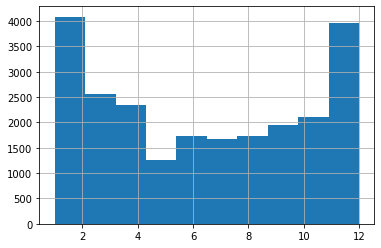

In [151]:
data['month_pub'].hist()

Вывод:
 - общая площадь; основная масса квартир до 100 кв.м.
 - жилая площадь; основная масса квартир до 50 кв.м.
 - площадь кухни; в основном до 10 кв.м.
 - цена объекта; основная масса квартир до 7 млн.руб.
 - количество комнат; в основном от 1 до 3-х.
 - высота потолков; основная масса квартир от 2.4 м. до 2.8 м.
 - этаж квартиры; большинство квартир до 5-го этажа.
 - тип этажа квартиры («первый», «последний», «другой»); основная масса квартир не на первом и не на
последнем этаже.
 - общее количество этажей в доме; основная масса квартир в домах этажностью от 5 до 12 этажей.
 - расстояние до центра города в метрах; большинство квартир на расстоянии от 7000 м. до 20000 м. 
до центра.
 - расстояние до ближайшего аэропорта; основная масса квартир на расстоянии от 10000 до 20000 м. от 
аэропорта.
 - расстояние до ближайшего парка; у основной массы квартир до парка 1000 м.
 - день и месяц публикации объявления; больше всего публикаций среди недели, и за месяц до нового
года и за два месяца после.


4.2  Изучение времени продажи квартиры

In [152]:
data['days_exposition'].describe()

count    20289.000000
mean       179.528365
std        218.568502
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

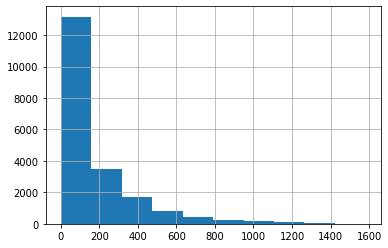

In [153]:
data['days_exposition'].hist()

На данных графиках видно, что распределение равномерное, с редкими выбросами. 
Среднее значение равняется 180 дням, а медиана равна 95 дням. В основном квартиры продаются за срок в 95 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев.
Быстрой продажей можно назвать срок в 45 дней и меньше. Долгой продажей - 230 дней. 

4.3 Факторы, влияющие на стоимость квартиры

Изучать факторы, влияющие на стоимость квартиры буду с помощью метода корреляции. 

In [154]:
data.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_m,day_pub_week,month_pub,year_pub,floor_gr,city_centr_nrst_km
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,482,2,755,<NA>,120370.0,3,3,2019,другой,16.0


In [155]:
list_fact = data[['last_price',
                  'total_area',
                  'living_area',
                  'kitchen_area',
                  'rooms',
                  'floor_gr']].corr().round(2)
list_fact.style.background_gradient(cmap='coolwarm')

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.780000,0.640000,0.620000,0.500000
total_area,0.780000,1.000000,0.880000,0.610000,0.800000
living_area,0.640000,0.880000,1.000000,0.350000,0.840000
kitchen_area,0.620000,0.610000,0.350000,1.000000,0.280000
rooms,0.500000,0.800000,0.840000,0.280000,1.000000


<AxesSubplot:xlabel='total_area'>

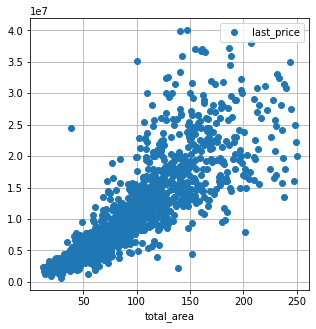

In [156]:
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
# Диаграмма рассеяния, зависимости цены от общей площади.

<AxesSubplot:xlabel='living_area'>

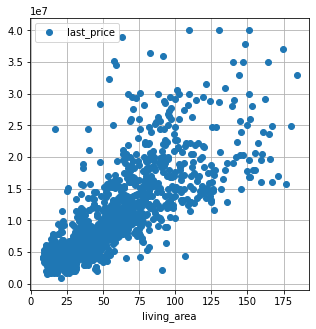

In [157]:
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
# Диаграмма рассеяния, зависимости цены от жилой площади.

<AxesSubplot:xlabel='kitchen_area'>

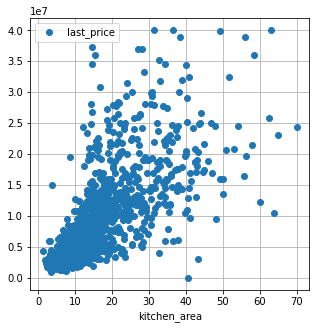

In [158]:
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
# Диаграмма рассеяния, зависимости цены от кухонной площади.

<AxesSubplot:xlabel='rooms'>

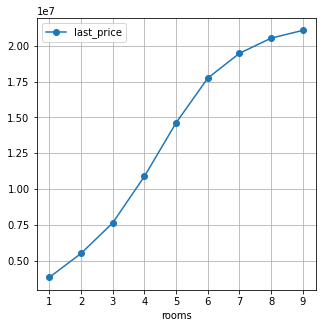

In [159]:
data.query('rooms > 0').pivot_table(index='rooms', values='last_price').plot(grid=True,
style='o-', figsize=(5, 5))# Зависимость цены от числа комнат.

<AxesSubplot:xlabel='floor_gr'>

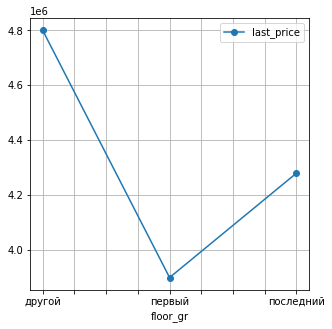

In [160]:
data.pivot_table(index='floor_gr', values='last_price', aggfunc='median').plot(grid=True, style='o-', 
figsize=(5, 5))# Зависимость цены от этажа.

<AxesSubplot:xlabel='day_pub_week'>

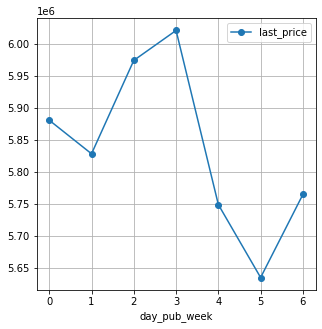

In [161]:
data.pivot_table(index='day_pub_week', values='last_price').plot(grid=True, style='o-', 
figsize=(5, 5))# Зависимость от дня размещения.

<AxesSubplot:xlabel='month_pub'>

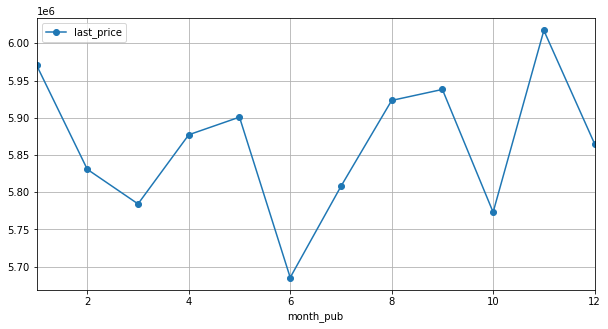

In [162]:
data.pivot_table(index='month_pub', values='last_price').plot(grid=True, style='o-', xlim=(1,12), 
figsize=(10, 5))# Зависимость от месяца размещения.

<AxesSubplot:xlabel='year_pub'>

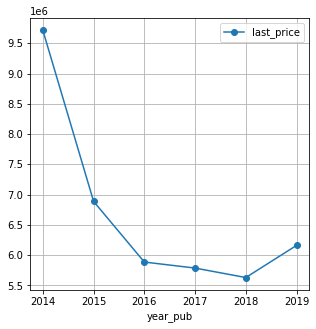

In [163]:
data.pivot_table(index='year_pub', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
# Зависимость от года размещения.

Вывод: на заметку - выбивающиеся значения в столбцах площади и комнат, это злитная недвижимость,
удалять не стал. Чем больше площадь, тем выше стоимость. Корреляция  параметров площади высокая. Число комнат влияет на цену, и зависимость ниже, чем у площади. Можно сделать два вывода: бывают квартиры с большими по площади комнатами; квартиры в центре состоят из малого числа комнат, но стоят дорого.
Первый этаж влияет на стоимость квартиры - квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.
День недели: дороже всего квартиры, опубликованные в субботу, дешевле всего - в воскресенье.
Месяц: дороже всего квартиры, продающиеся с конца декабря, дешевле всего - с октября.
Год: квартиры подешевели в 2016-2018 годах, что, вероятно, вызвано некоторым кризисом 2014-2015 годов. В 2019 году цены снова стали повышаться, т.к. экономическая ситуация начала восстанавливаться.

4.4  Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [164]:
round(data.pivot_table(index='locality_name', values='price_sq_m', aggfunc=['count', 'mean',])\
.sort_values(('count', 'price_sq_m'), ascending=False) .head(10).sort_values(('mean', 'price_sq_m'),
ascending=False))# Округлённаая до целых, сводная таблица - цена одного квадратного метра в 10 
# населённых пунктах с наибольшим числом объявлений.

,count,mean
,price_sq_m,price_sq_m
locality_name,,
санкт-петербург,15491,111744.0
пушкин,367,103131.0
деревня кудрово,299,92474.0
поселок парголово,327,90176.0
поселок мурино,556,85682.0
поселок шушары,440,78677.0
колпино,337,75333.0
гатчина,307,68746.0


Cамая дорогая недвижимость в Санкт-Петербурге. Меньше всего стоимость квадратного метра в Выборге.
В ТОП-10 входят ближайшие к Санкт-Петербургу города.

4.5  Средняя стоимость квадратного метра площади квартир, по каждому километру удалённости от центра Санкт-Петербурга. 

In [165]:
round(data[data['locality_name']=='санкт-петербург'].pivot_table(index='city_centr_nrst_km',
values='price_sq_m', aggfunc='mean'))# Округлённаая до целых, сводная таблица, средней цены за 
# квадратный метр, по каждому километру удалённости от центра Санкт-Петербурга.

,price_sq_m
city_centr_nrst_km,
0.0,162697.0
1.0,145426.0
2.0,135977.0
3.0,117464.0
4.0,127425.0
5.0,134323.0
6.0,136588.0
7.0,138800.0
8.0,124678.0


Стоимость в большинстве показателей  - уменьшается в зависимости от удалённости, но присутствуют
несколько районов в которых стоимость не соответствует снижению. Возможно пристижные райны с высокой 
стоимостью.

### Общий вывод

По изначальной таблице  и гистограмммам видно следующее, что в датасете в наваниях столбцов, разный регистр; есть пропуски; есть аномальные значения, несоответствие типов данных, нужно поменять формат даты; по гистограммам видно, что присутствуют шумы и выбросы в значениях.

Количество обнаруженных пропусков из 23699:

9195 ceiling_height - практически в трети объявлений пропущена высота потолков, пропуски заполним медианным значением.

86 floors_total - данные просто не заполнили из выборки, количество этажей в доме определить невозможно, процент пропусков маленький, оставим как есть.

1903 living_area - заменим пропуски и не логичные значения - медианным значением.

20924 is_apartment - всего аппартаменты - 50, можем предположить что пропуски, это не апартаменты и присвоить False.

2278 kitchen_area - меняем пропуски на медианное з.

11519 balcony - скорее всего там нет балконов, заполняем 0

49 locality_name - Пропусков мало удаляем их.

5542 airports_nearest - оставляем без изменений. Если далее мешает исследованию, мняем значение.

5519 city_centers_nearest - оставляем без изменений. Если далее мешает исследованию, мняем значение.

5518 parks_around3000 - возможно парков нет в радиусе 3км, заменим на 0.

15620 parks_nearest - возможно рядом парков нет, оставляем без изменений.

5518 ponds_around3000 - значит прудов нет в радиусе 3км, заменим на 0.

14589 ponds_nearest - оставляем без изменений.

3181 days_exposition - оставляем NaN.

Количество пропусков 'ponds_around3000', совпадает с кличеством пропусков 'parks_around3000'. 
Возможные причины возникновения пропусков, данные не вписаны пользователем, данные получены автоматически, на основе картографических данных, не для всех объектов, ошибка в записи,
ошибки при выгрузке файла, ошибки при смене формата файла. Оставляем NaN в некоторых столбцах, может понадобиться для получкения доп. инфрмации. Замена пропусков медианным или средним значением не всегда будет корректной. Замена пропусков в некоторых столбцах произведена цисленным значением соотношения параметров. Столбцов с пропущнными значениями 14 из 22-х столбцов.
                Ниже представлены столбцы в которых будем менять типы данных, а в каких нет.
- total_images  -             int64 не меняем 
 - last_price  -               float64 меняем на int64
 - total_area  -               float64 не меняем, сотые и десятые нужны в площади
 - first_day_exposition -      поправили дату ранее на более удобную, тип встал автоматически
 - rooms -                     int64 не меняем
 - ceiling_height -            float64 не меняем, сотые и десятые нужны в площади
 - floors_total -              float64 меняем на int64, целые числа
 - living_area -               float64 не меняем
 - floor -                     int64 не меняем
 - is_apartment -              bool не меняем, два значения
 - studio -                    bool не меняем, два значения
 - open_plan -                 bool не меняем
 - kitchen_area -              float64 не меняем
 - balcony -                   float64 меняем на int64, целые числа
 - locality_name -             object меняем на string , строки
 - airports_nearest -          float64 меняем на int64, целые числа
 - city_centers_nearest -      float64 меняем на int64, целые числа
 - parks_around3000 -          float64 меняем на int64, целые числа
 - parks_nearest -             float64 меняем на int64, целые числа
 - ponds_around3000 -          float64 меняем на int64, целые числа
 - ponds_nearest -             float64 меняем на int64, целые числа
 - days_exposition -           float64 меняем на int64, целые числа
 
Замена типа данных была произведена методом автоматической замены тип данных convert_dtypes ().

В столбце locality_name были обнаружены дубликаты и разный регистр написания, регистр приведён к общему стилю. В столбце 'locality_name' выявлены строки, в которых не был указан населенный пункт, а также неявные дубликаты: в наименованиях населенных пунктов использовался разный стиль написания, что затруднило бы дальнейший анализ данных. Для удобства восприятия сзданы два новые два столбца, 'locality_type' - отдельный столбец для очищенных и сгруппированных типов населённых пунктов, и 'locality_clean_name' - с наименованиями, без типа населенных пунктов. Причина пропусков и различного стиля написания населенных пунктов - либо в разных источниках данных, либо субъективный человеческий фактор при заполнении таблицы. Количество уникальных значений составило 305.

 - Регистр столбцов приведён к нижнему.
 - Формат даты приведён к удобному для восприятия год, месяц, число.

В результате исследовательского анализа выяснилось следующее: минимальная общяя площадь картиры 12 кв.м. Квартиры большой площади подходят под определение элитная недвижимость. Подходят под определение выбивающиеся значения, были отброшены. 
Медианное время продажи - 95 дней. Среднее время продажи - 181 день. В основном квартиры продаются за срок в 100 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев. Быстрой продажей можно назвать срок в 45 дней и меньше. Долгой продажей - 230 дней (7,5 месяцев) и дольше. Объявления с большим сроком продажи скорее всего забыли снять с публикации.

- общая площадь; основная масса квартир до 100 кв.м.
 - жилая площадь; основная масса квартир до 50 кв.м.
 - площадь кухни; в основном до 10 кв.м.
 - цена объекта; основная масса квартир до 7 млн.руб.
 - количество комнат; в основном от 1 до 3-х.
 - высота потолков; основная масса квартир от 2.4 м. до 2.8 м.
 - этаж квартиры; большинство квартир до 5-го этажа.
 - тип этажа квартиры («первый», «последний», «другой»); основная масса квартир не на первом и не на
последнем этаже.
 - общее количество этажей в доме; основная масса квартир в домах этажностью от 5 до 12 этажей.
 - расстояние до центра города в метрах; большинство квартир на расстоянии от 7000 м. до 20000 м. 
до центра.
 - расстояние до ближайшего аэропорта; основная масса квартир на расстоянии от 10000 до 20000 м. от 
аэропорта.
 - расстояние до ближайшего парка; у основной массы квартир до парка 1000 м.
 - день и месяц публикации объявления; больше всего публикаций среди недели, и за месяц до нового
года и за два месяца после.


Чем больше площадь, тем выше стоимость. Корреляция параметров площади высокая. Число комнат влияет на цену, и зависимость ниже, чем у площади. Можно сделать два вывода: бывают квартиры с большими по площади комнатами; квартиры в центре состоят из малого числа комнат, но стоят дорого. Первый этаж влияет на стоимость квартиры - квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже. День недели: дороже всего квартиры, опубликованные в субботу, дешевле всего - в воскресенье. Месяц: дороже всего квартиры, продающиеся с конца декабря, дешевле всего - с октября. Год: квартиры подешевели в 2016-2018 годах, что, вероятно, вызвано некоторым кризисом 2014-2015 годов. В 2019 году цены снова стали повышаться, т.к. экономическая ситуация начала восстанавливаться.

Cамая дорогая недвижимость в Санкт-Петербурге. Меньше всего стоимость квадратного метра в Выборге. В ТОП-10 входят ближайшие к Санкт-Петербургу города.

Стоимость в большинстве показателей удалённости от центра Санкт-Петербурга - уменьшается в зависимости от удалённости, но присутствуют несколько районов в которых стоимость не соответствует снижению. Возможно пристижные райны с высокой стоимостью недвижимости. Центр города Санкт-Петербурга расположен неравномерно от центральной точки. С нескольких сторон его огибает река. Из этого следует, что по разным направлениям от точки отсчёта, разное расстояние. 



**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод